**Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters**
**Draw the inferences from the clusters obtained.**

**Data Description:**

The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not


**Hierarchical Clustering**

A Hierarchical clustering method works via grouping data into a tree of clusters.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
from google.colab import files
uploaded=files.upload()

Saving EastWestAirlines (2).csv to EastWestAirlines (2).csv


In [3]:
df=pd.read_csv("EastWestAirlines (2).csv")

In [4]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [6]:
#Normalise data function

def norm_func(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [7]:
#Normalise Data frame
df_nor=norm_func(df.iloc[:,1:])

In [8]:
from sklearn.preprocessing import MinMaxScaler

trans=MinMaxScaler()
df1=pd.DataFrame(trans.fit_transform(df.iloc[:,1:]))
df1

,0,1,2,3,4,5,6,7,8,9,10
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


In [9]:
df_nor

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


A dendrogram is a diagram that shows the hierarchical relationship between objects

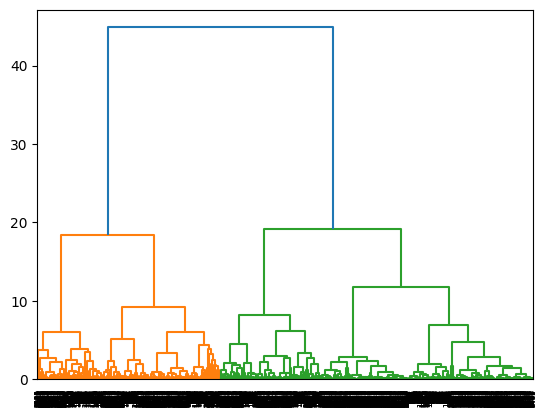

In [10]:
#create Dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_nor,method="ward"))

In [11]:
#create Clusters

h_c = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average")

In [13]:
y_hc=h_c.fit_predict(df_nor)
clusters = pd.DataFrame(y_hc,columns=["Clusters"])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [14]:
df_nor["h_clusterid"]=clusters

In [15]:
df_nor.sort_values("h_clusterid")

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
1999,0.191881,0.130248,1.00,0.0,0.00,0.371644,0.290698,0.011357,0.056604,0.535086,1.0,0
1505,0.229478,0.000000,0.50,0.0,0.00,0.104181,0.232558,0.051919,0.132075,0.591150,1.0,0
1503,0.297607,0.000000,0.75,0.0,0.00,0.196314,0.209302,0.014602,0.018868,0.574873,1.0,0
3165,0.114272,0.000000,0.00,0.0,0.00,0.078965,0.290698,0.215693,0.226415,0.292018,1.0,0
1501,0.031743,0.165590,0.50,0.0,0.00,0.132723,0.162791,0.000000,0.000000,0.584278,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.056678,0.106028,0.00,0.0,0.50,0.186052,0.302326,0.074634,0.169811,0.812153,1.0,4
1946,0.074419,0.000000,0.75,0.0,1.00,0.362546,0.372093,0.016225,0.018868,0.467567,1.0,4
2364,0.063397,0.000000,1.00,0.0,1.00,0.822974,0.279070,0.000000,0.000000,0.429829,1.0,4
1878,0.075258,0.000000,1.00,0.0,0.75,0.501595,0.372093,0.012980,0.037736,0.494454,1.0,4


In [16]:
df_nor.iloc[:,1:].groupby(df_nor.h_clusterid).mean()

,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
h_clusterid,,,,,,,,,,,
0,0.021580,0.414169,0.007834,0.000170,0.107487,0.180779,0.026094,0.046450,0.557646,1.0,0.0
1,0.007858,0.176330,0.006950,0.002184,0.038788,0.106314,0.007343,0.012311,0.460411,0.0,1.0
2,0.000000,0.000000,0.000000,0.000000,0.064880,0.372093,0.156505,0.433962,0.877864,1.0,2.0
3,0.031127,0.375000,0.000000,0.000000,0.248912,0.805233,0.647694,0.929245,0.265041,1.0,3.0
4,0.013253,0.718750,0.000000,0.812500,0.437163,0.351744,0.019470,0.037736,0.618022,1.0,4.0


In [17]:
hc = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="average").fit(df_nor)
cluster_labels = pd.Series(hc.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [18]:
df["clus"]=cluster_labels
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clus
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [19]:
df.iloc[:,1:].groupby(df.clus).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clus
clus,,,,,,,,,,,,
0,9.597426e+04,240.572888,2.656676,1.015668,1.000681,28342.702997,15.547003,804.152589,2.461853,4627.118529,1.0,0.0
1,5.980784e+04,87.602462,1.705322,1.013900,1.008737,10227.689039,9.142971,226.292295,0.652502,3820.652105,0.0,1.0
2,7.656512e+04,147.750000,3.875000,1.000000,4.250000,115273.250000,30.250000,600.000000,2.000000,5127.875000,1.0,2.0
3,1.704838e+06,0.000000,1.000000,1.000000,1.000000,17108.000000,32.000000,4823.000000,23.000000,7283.000000,1.0,3.0
4,1.319995e+05,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.0,4.0


**K_Means Clustering**

k-means clustering tries to group similar kinds of items in form of clusters

In [20]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
k_means = kmeans.fit_predict(df_nor)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [21]:
#Normalising

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.iloc[:,1:])
scaled_df

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.39545434e+00, -7.66919299e-01,  7.25583322e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.37995704e+00, -7.66919299e-01,  7.25583322e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
         1.41192021e+00, -7.66919299e-01,  7.25583322e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -1.31560393e+00,  1.30391816e+00, -1.28106101e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31608822e+00, -7.66919299e-01,  7.25583322e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -1.31754109e+00, -7.66919299e-01,  7.25583322e-01]])

In [22]:
wcss = []
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(scaled_df)
  wcss.append(kmeans.inertia_)
  if i>5:
    break
wcss

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[47987.999999999985,
 38054.40958538285,
 33380.432326569986,
 29473.93070204697,
 26038.75201202943,
 22660.562800172804]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

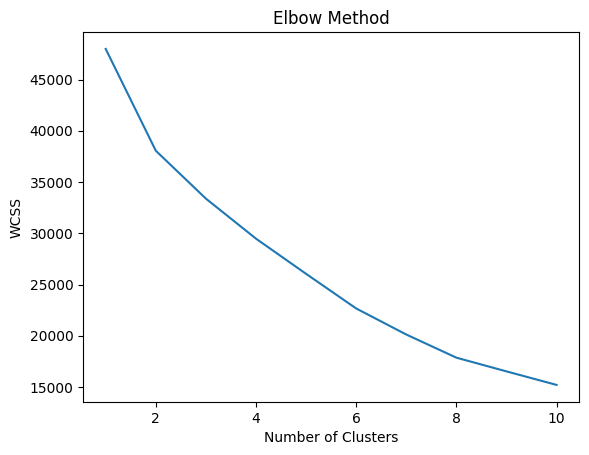

In [23]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [24]:
#Build Cluster Aalgorithm

Clusters_new=KMeans(n_clusters=4,random_state=16)
Clusters_new.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=16)

In [25]:
Clusters_new.labels_

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

In [26]:
# Assign clusters to data set

df["n_clusterid"]=Clusters_new.labels_
Clusters_new.cluster_centers_

array([[-1.70812449e-01, -7.59022823e-02, -2.85739541e-01,
        -1.71244669e-03, -5.85951454e-02, -3.24540347e-01,
        -2.97925073e-01, -2.07975379e-01, -2.31516508e-01,
        -1.53023942e-01, -7.66919299e-01,  7.25583322e-01],
       [ 1.58660939e+00,  8.55438088e-01,  4.02844891e-01,
         1.22636659e-01, -6.27665798e-02,  1.06216364e+00,
         1.76992781e+00,  3.17324858e+00,  3.49535897e+00,
         3.78341621e-01,  9.21263412e-01, -7.03060197e-01],
       [ 8.77853110e-02,  2.25311688e-02,  4.55596420e-01,
        -1.25638004e-02, -5.89551799e-02,  4.12155962e-01,
         2.82974743e-01, -5.47541656e-02, -5.61286731e-02,
         2.25159117e-01,  1.27156132e+00, -1.24970719e+00],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01,  1.79579363e+00]])

In [27]:
df.groupby("n_clusterid").agg(["mean"]).reset_index()

,n_clusterid,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clus
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,2182.077362,56389.741857,85.399023,1.666124,1.014251,1.000814,9307.862785,8.741042,168.883143,0.495521,3802.583876,0.000000,1.000000
1,1,1638.853261,233472.951087,805.853261,2.614130,1.032609,1.000000,42793.918478,28.597826,4902.711957,14.630435,4899.788043,0.815217,0.288043
2,2,1764.552827,82446.844494,161.543899,2.686756,1.012649,1.000744,27097.566964,14.319196,383.398065,1.160714,4583.485119,0.984375,0.015625
3,3,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,1.533333


In [28]:
df[df["n_clusterid"]==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clus,n_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0


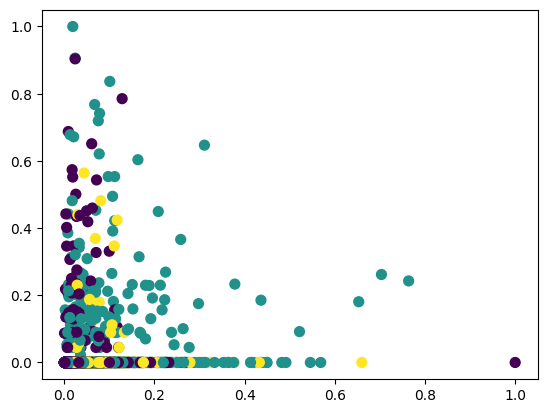

In [29]:
x=df_nor.values
plt.scatter(x[:, 0], x[:, 1], c=k_means, s=50, cmap='viridis')

**DBSCAN CLUSTERING**

**Density-based spatial clustering of applications with noise**(DBSCAN)

An algorithm identifies the dense region by grouping together data points that are closed to each other based on distance measurement.

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [31]:
arr=df.values
arr

array([[    1, 28143,     0, ...,     0,     1,     0],
       [    2, 19244,     0, ...,     0,     1,     0],
       [    3, 41354,     0, ...,     0,     1,     0],
       ...,
       [ 4019, 73597,     0, ...,     1,     0,     2],
       [ 4020, 54899,     0, ...,     0,     1,     0],
       [ 4021,  3016,     0, ...,     0,     1,     0]])

In [32]:
#Normalising

sc=StandardScaler().fit(arr)
scaled_df=sc.transform(arr)
scaled_df

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.25583322e-01, -7.72314536e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.25583322e-01, -7.72314536e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.25583322e-01, -7.72314536e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
         1.30391816e+00, -1.28106101e+00,  1.34526231e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.25583322e-01, -7.72314536e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -7.66919299e-01,  7.25583322e-01, -7.72314536e-01]])

In [33]:
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
sns.set()

neighbors = NearestNeighbors(n_neighbors=6)
fitneighbors = neighbors.fit(scaled_df)
distances, indices = fitneighbors.kneighbors(scaled_df)

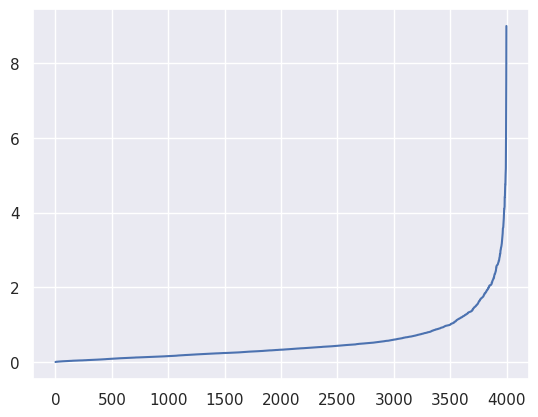

In [34]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]
plt.plot(distances)

In [35]:
#Building Model

dbscan=DBSCAN(eps=1.2,min_samples=4)
dbscan.fit(scaled_df)

DBSCAN(eps=1.2, min_samples=4)

In [36]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [37]:
cl=pd.DataFrame(dbscan.labels_,columns=["Clsuters"])
cl

,Clsuters
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [38]:
import sklearn
sklearn.metrics.silhouette_score(scaled_df,dbscan.labels_)

0.18274600023041873

In [39]:
pd.concat([df,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clus,n_clusterid,Clsuters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,1,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,2,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,2,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,2,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1,0,0


**Conclusion**

From the above data generated from K-Means clustering, we can see Cluster-1 has around 63% total travelers and cluster 2 has 33% of the travelers.

We will target cluster 1 & 2. Cluster 1 contains less frequent or first time travellers, by giving them discount provided they travel more than twice or thrice and introduce more offer if they register or take the membership.